<a href="https://colab.research.google.com/github/SwordNoobOne/TelecomXParte2/blob/main/TelecomX_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🛠️ Preparación de los Datos




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datos.csv', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   Contract          7043 non-null   object 
 8   PaperlessBilling  7043 non-null   bool   
 9   PaymentMethod     7043 non-null   object 
 10  Charges.Monthly   7043 non-null   float64
 11  Charges.Total     7032 non-null   float64
 12  PhoneService      7043 non-null   bool   
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [2]:
df = df.dropna(subset=['Charges.Total'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   bool   
 4   Partner           7032 non-null   bool   
 5   Dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   Contract          7032 non-null   object 
 8   PaperlessBilling  7032 non-null   bool   
 9   PaymentMethod     7032 non-null   object 
 10  Charges.Monthly   7032 non-null   float64
 11  Charges.Total     7032 non-null   float64
 12  PhoneService      7032 non-null   bool   
 13  MultipleLines     7032 non-null   object 
 14  InternetService   7032 non-null   object 
 15  OnlineSecurity    7032 non-null   object 
 16  OnlineBackup      7032 non-null   object 
 17  

In [3]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
Contract,0
PaperlessBilling,0
PaymentMethod,0


In [4]:
df_model = df.drop('customerID', axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   bool   
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   bool   
 4   Dependents        7032 non-null   bool   
 5   tenure            7032 non-null   int64  
 6   Contract          7032 non-null   object 
 7   PaperlessBilling  7032 non-null   bool   
 8   PaymentMethod     7032 non-null   object 
 9   Charges.Monthly   7032 non-null   float64
 10  Charges.Total     7032 non-null   float64
 11  PhoneService      7032 non-null   bool   
 12  MultipleLines     7032 non-null   object 
 13  InternetService   7032 non-null   object 
 14  OnlineSecurity    7032 non-null   object 
 15  OnlineBackup      7032 non-null   object 
 16  DeviceProtection  7032 non-null   object 
 17  

In [5]:
# Verificar estructura inicial
print("Estructura inicial de df_model:")
df_model.info()

# Identificar tipos de columnas
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()
bool_cols = df_model.select_dtypes(include=['bool']).columns.tolist()
numeric_cols = df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nColumnas categóricas:", categorical_cols)
print("Columnas booleanas:", bool_cols)
print("Columnas numéricas:", numeric_cols)

Estructura inicial de df_model:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   bool   
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   bool   
 4   Dependents        7032 non-null   bool   
 5   tenure            7032 non-null   int64  
 6   Contract          7032 non-null   object 
 7   PaperlessBilling  7032 non-null   bool   
 8   PaymentMethod     7032 non-null   object 
 9   Charges.Monthly   7032 non-null   float64
 10  Charges.Total     7032 non-null   float64
 11  PhoneService      7032 non-null   bool   
 12  MultipleLines     7032 non-null   object 
 13  InternetService   7032 non-null   object 
 14  OnlineSecurity    7032 non-null   object 
 15  OnlineBackup      7032 non-null   object 
 16  DeviceProtectio

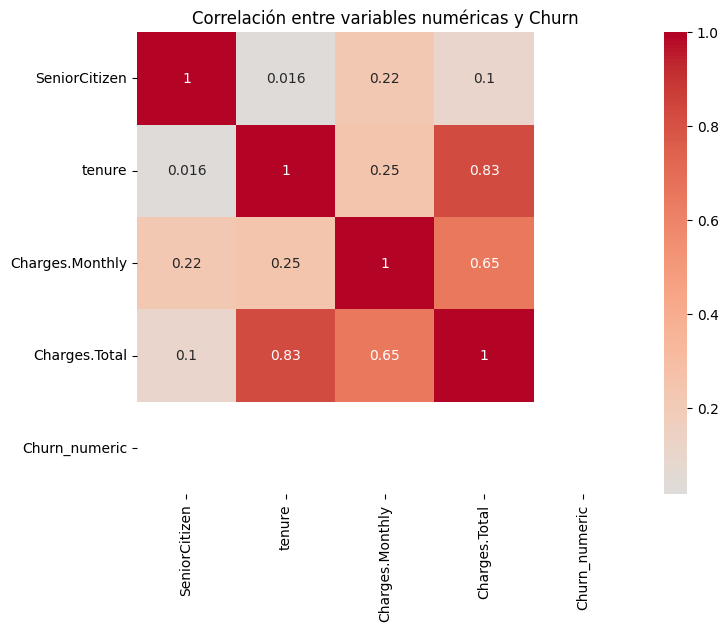

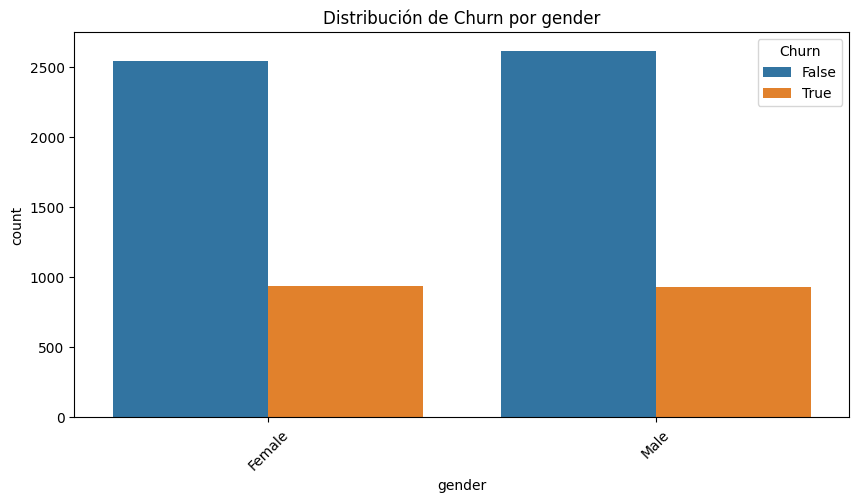


Proporción de Churn por gender:
Churn   False  True 
gender              
Female   73.0   27.0
Male     73.8   26.2


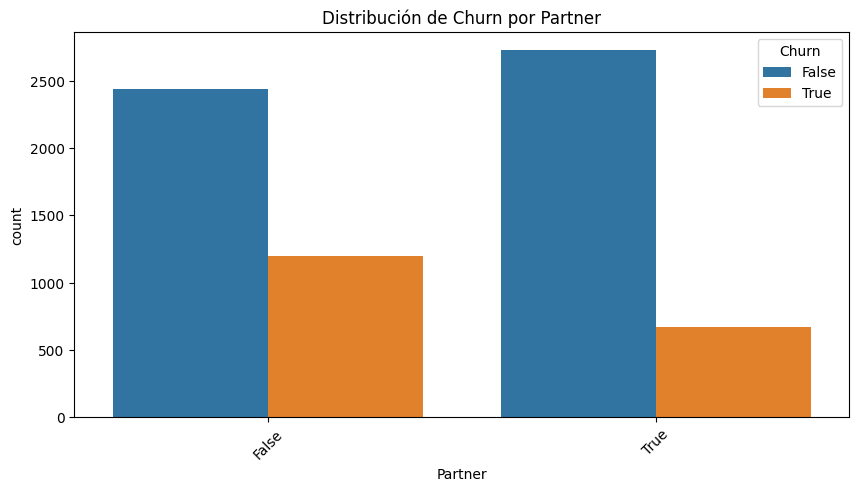


Proporción de Churn por Partner:
Churn    False  True 
Partner              
False     67.0   33.0
True      80.3   19.7


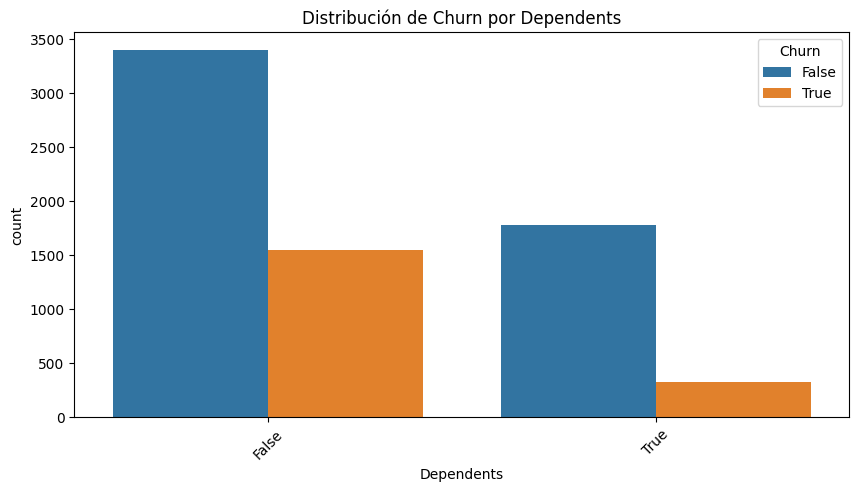


Proporción de Churn por Dependents:
Churn       False  True 
Dependents              
False        68.7   31.3
True         84.5   15.5


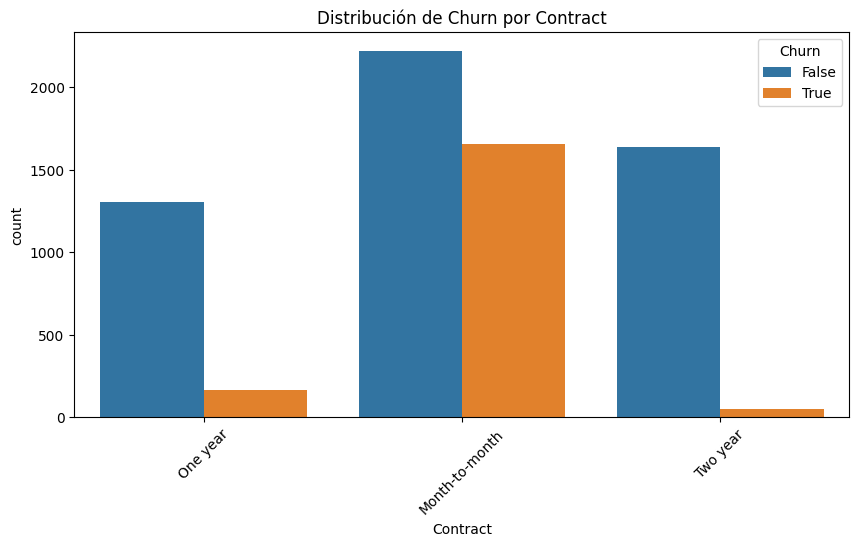


Proporción de Churn por Contract:
Churn           False  True 
Contract                    
Month-to-month   57.3   42.7
One year         88.7   11.3
Two year         97.2    2.8


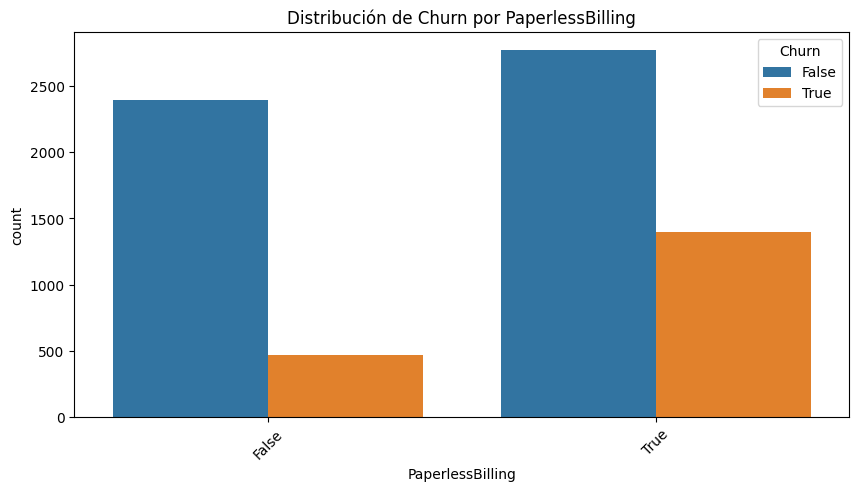


Proporción de Churn por PaperlessBilling:
Churn             False  True 
PaperlessBilling              
False              83.6   16.4
True               66.4   33.6


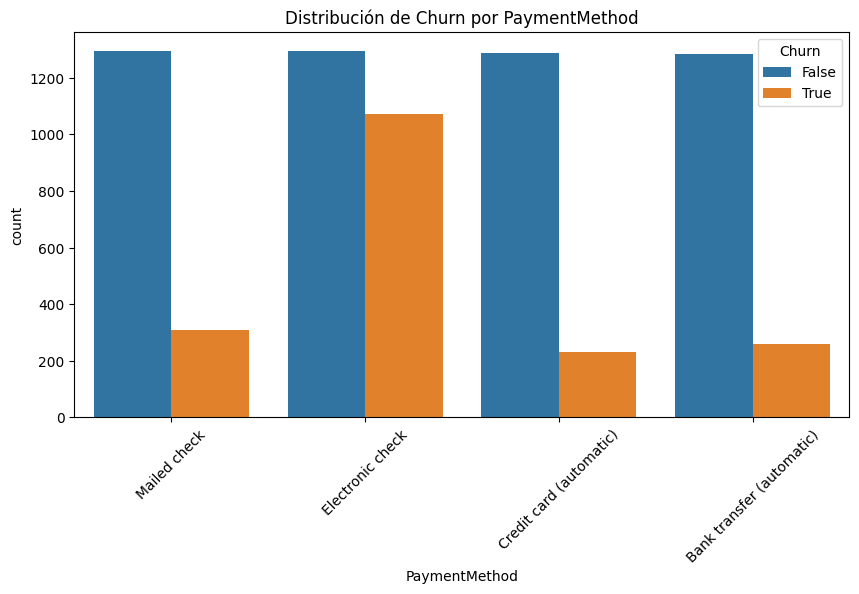


Proporción de Churn por PaymentMethod:
Churn                      False  True 
PaymentMethod                          
Bank transfer (automatic)   83.3   16.7
Credit card (automatic)     84.7   15.3
Electronic check            54.7   45.3
Mailed check                80.8   19.2


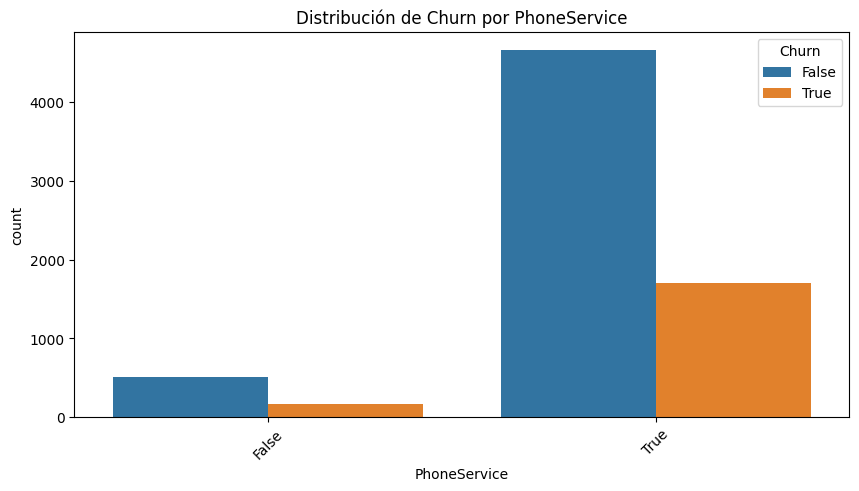


Proporción de Churn por PhoneService:
Churn         False  True 
PhoneService              
False          75.0   25.0
True           73.3   26.7


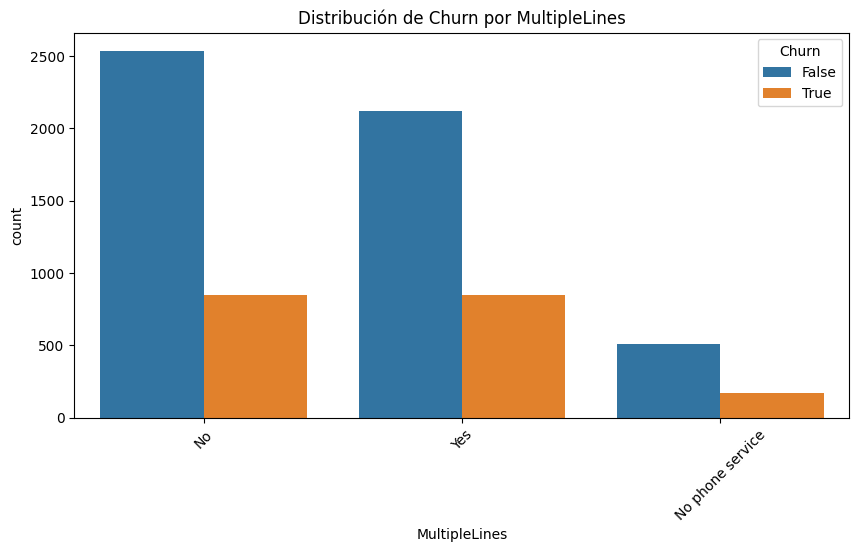


Proporción de Churn por MultipleLines:
Churn             False  True 
MultipleLines                 
No                 74.9   25.1
No phone service   75.0   25.0
Yes                71.4   28.6


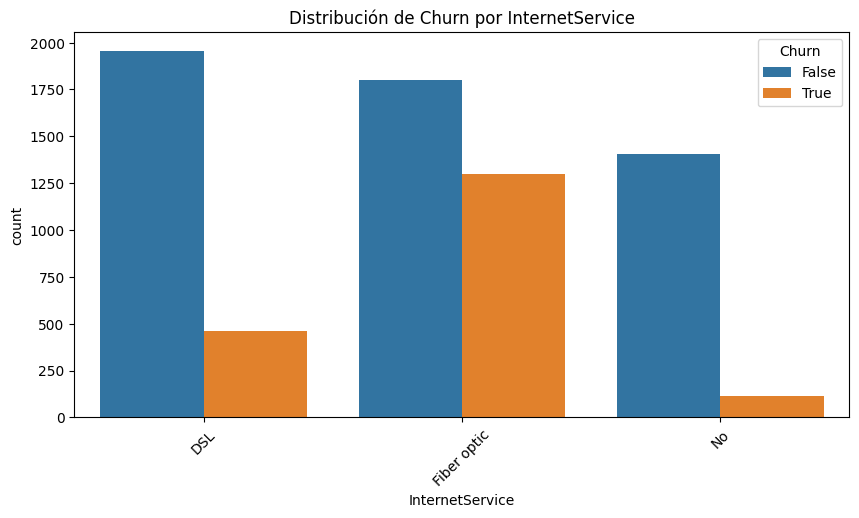


Proporción de Churn por InternetService:
Churn            False  True 
InternetService              
DSL               81.0   19.0
Fiber optic       58.1   41.9
No                92.6    7.4


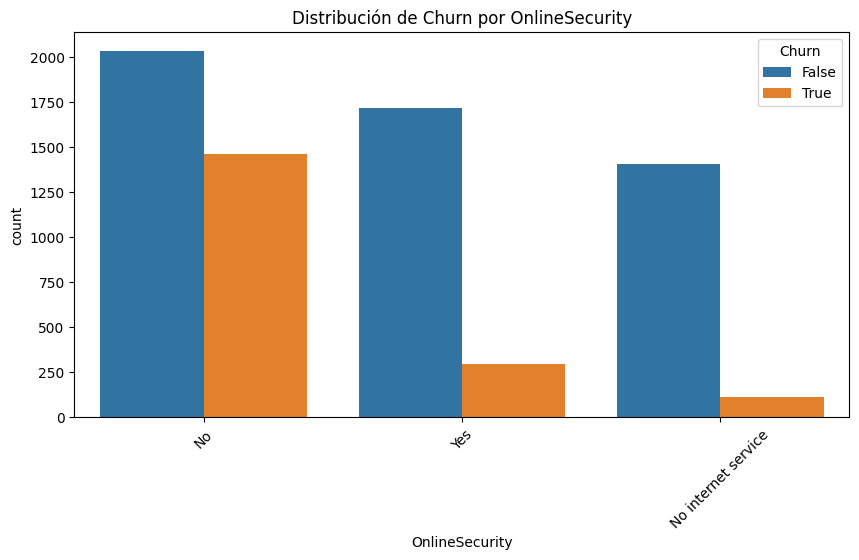


Proporción de Churn por OnlineSecurity:
Churn                False  True 
OnlineSecurity                   
No                    58.2   41.8
No internet service   92.6    7.4
Yes                   85.4   14.6


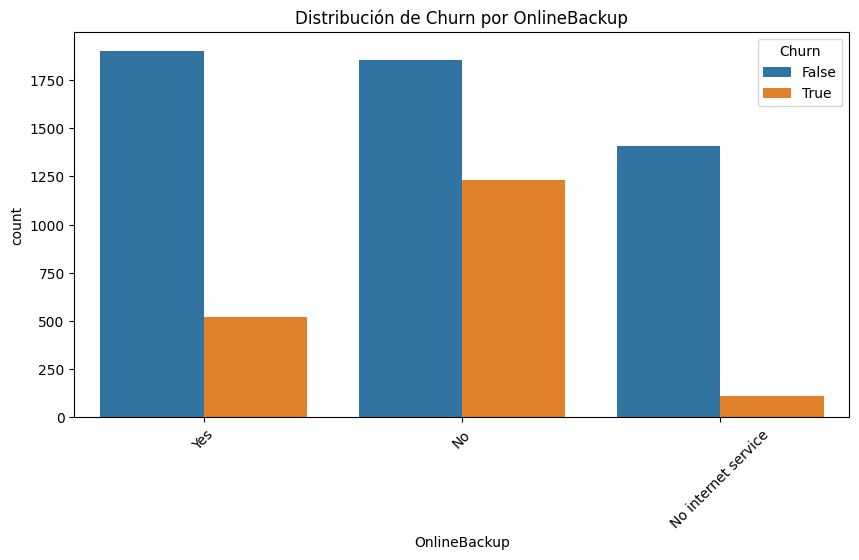


Proporción de Churn por OnlineBackup:
Churn                False  True 
OnlineBackup                     
No                    60.1   39.9
No internet service   92.6    7.4
Yes                   78.4   21.6


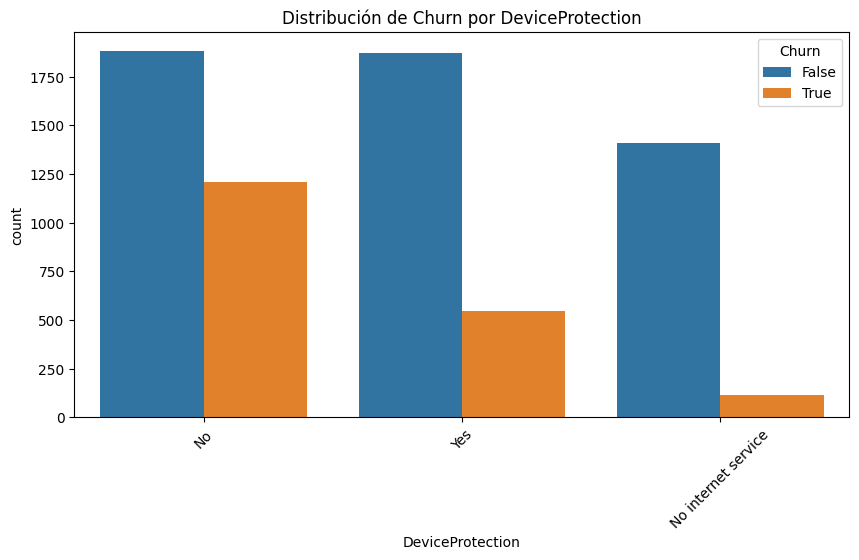


Proporción de Churn por DeviceProtection:
Churn                False  True 
DeviceProtection                 
No                    60.9   39.1
No internet service   92.6    7.4
Yes                   77.5   22.5


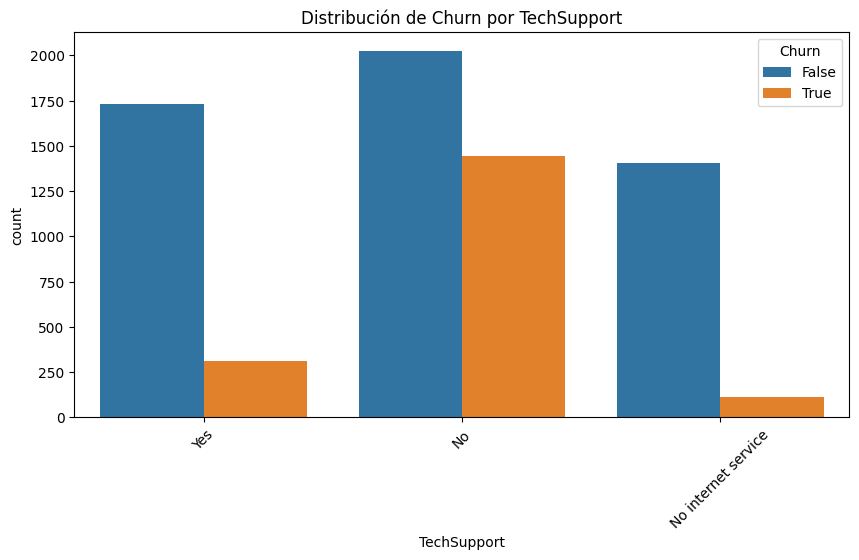


Proporción de Churn por TechSupport:
Churn                False  True 
TechSupport                      
No                    58.4   41.6
No internet service   92.6    7.4
Yes                   84.8   15.2


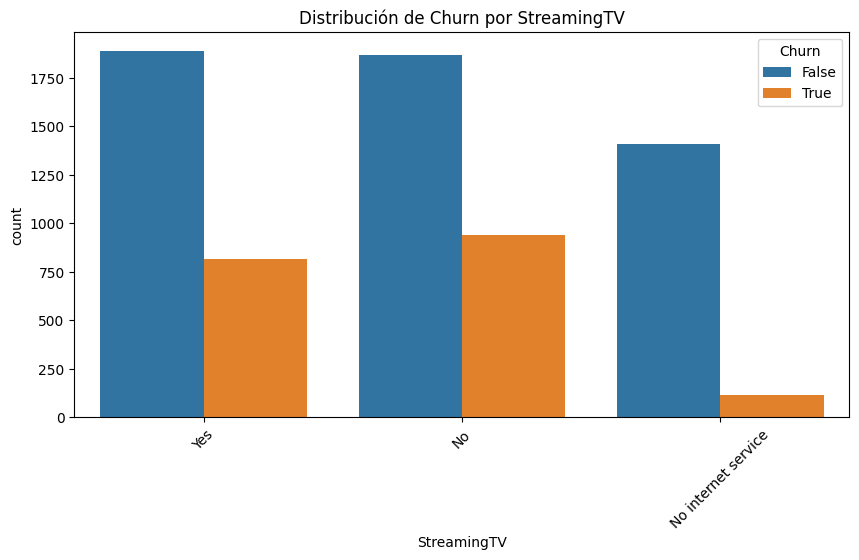


Proporción de Churn por StreamingTV:
Churn                False  True 
StreamingTV                      
No                    66.5   33.5
No internet service   92.6    7.4
Yes                   69.9   30.1


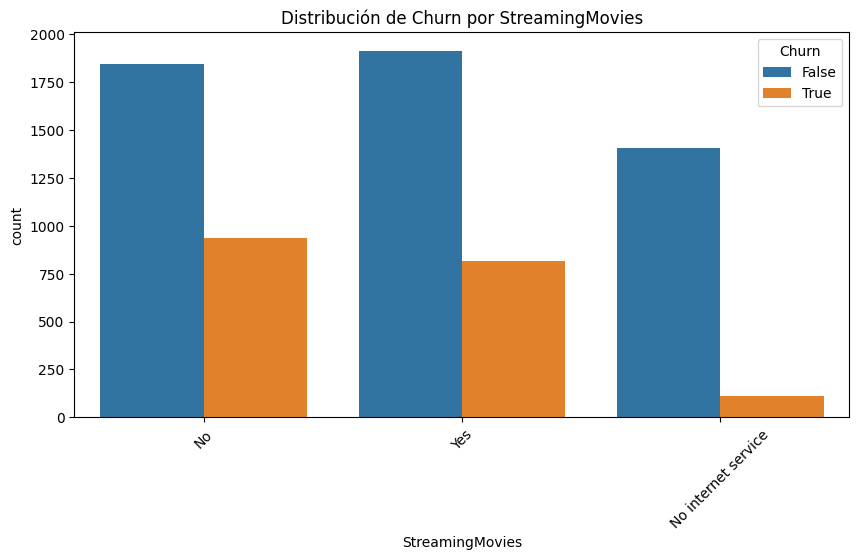


Proporción de Churn por StreamingMovies:
Churn                False  True 
StreamingMovies                  
No                    66.3   33.7
No internet service   92.6    7.4
Yes                   70.0   30.0


In [6]:
# Preparación de datos
df_analysis = df_model.copy()

# Convertir Churn a variable numérica binaria (1 para 'Yes', 0 para 'No')
df_analysis['Churn_numeric'] = df_analysis['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convertir Charges.Total a numérico (eliminando posibles caracteres no numéricos)
df_analysis['Charges.Total'] = df_analysis['Charges.Total'].replace('[\$,]', '', regex=True).astype(float)

# 1. Correlación con variables numéricas
numeric_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Churn_numeric']
numeric_corr = df_analysis[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre variables numéricas y Churn')
plt.show()

# 2. Análisis de variables categóricas con Churn
categorical_cols = ['gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling',
                   'PaymentMethod', 'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies']

# Gráficos de barras para ver relación entre categóricas y Churn
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_analysis, x=col, hue='Churn')
    plt.title(f'Distribución de Churn por {col}')
    plt.xticks(rotation=45)
    plt.show()

    # Tabla de proporciones
    prop_table = pd.crosstab(df_analysis[col], df_analysis['Churn'], normalize='index')*100
    print(f"\nProporción de Churn por {col}:")
    print(prop_table.round(1))

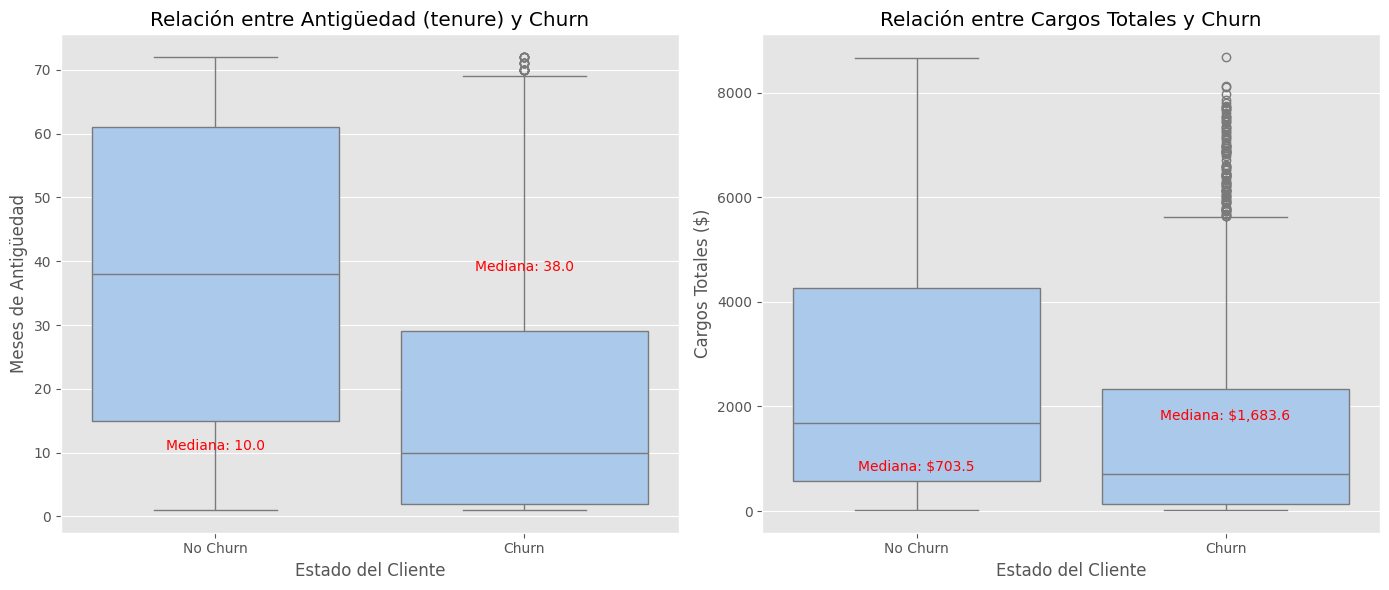


Análisis Estadístico Descriptivo

Variable: tenure
           count   mean    std  min   25%   50%   75%   max
Churn                                                      
Churn     1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0
No Churn  5163.0  37.65  24.08  1.0  15.0  38.0  61.0  72.0

Variable: Charges.Total
           count     mean      std    min     25%      50%      75%      max
Churn                                                                       
Churn     1869.0  1531.80  1890.82  18.85  134.50   703.55  2331.30  8684.80
No Churn  5163.0  2555.34  2329.46  18.80  577.83  1683.60  4264.12  8672.45


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo
plt.style.use('ggplot')
sns.set_palette("pastel")

# 1. Preparar los datos
df_plot = df[['tenure', 'Charges.Total', 'Churn']].copy()
df_plot['Churn'] = df_plot['Churn'].map({False: 'No Churn', True: 'Churn'}) # Correcting mapping from boolean to string

# 2. Crear la figura
plt.figure(figsize=(14, 6))

# 3. Boxplot para Tenure
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(x='Churn', y='tenure', data=df_plot)
plt.title('Relación entre Antigüedad (tenure) y Churn')
plt.xlabel('Estado del Cliente')
plt.ylabel('Meses de Antigüedad')

# Añadir las medianas
medians_tenure = df_plot.groupby('Churn')['tenure'].median().reset_index()
pos = range(len(medians_tenure))
for tick, label in zip(pos, ax1.get_xticklabels()):
    ax1.text(pos[tick], medians_tenure['tenure'][tick],
             f'Mediana: {medians_tenure["tenure"][tick]:.1f}',
             ha='center', va='bottom', fontsize=10, color='red')

# 4. Boxplot para Charges.Total
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x='Churn', y='Charges.Total', data=df_plot)
plt.title('Relación entre Cargos Totales y Churn')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cargos Totales ($)')

# Añadir las medianas
medians_charges = df_plot.groupby('Churn')['Charges.Total'].median().reset_index()
pos = range(len(medians_charges))
for tick, label in zip(pos, ax2.get_xticklabels()):
    ax2.text(pos[tick], medians_charges['Charges.Total'][tick],
             f'Mediana: ${medians_charges["Charges.Total"][tick]:,.1f}',
             ha='center', va='bottom', fontsize=10, color='red')

# 5. Ajustes finales
plt.tight_layout()
plt.show()

# 6. Análisis estadístico descriptivo
print("\n" + "="*60)
print("Análisis Estadístico Descriptivo")
print("="*60)

for var in ['tenure', 'Charges.Total']:
    print(f"\nVariable: {var}")
    print(df_plot.groupby('Churn')[var].describe().round(2))

In [8]:
# Preparación de datos
df_processed = df_model.copy()

# Convertir columnas booleanas a int8 (excepto 'Churn')
for col in bool_cols:
    if col != 'Churn':  # Excluir la variable objetivo
        df_processed[col] = df_processed[col].astype('int8')

# Aplicar pd.get_dummies() excluyendo 'Churn' y las ya convertidas booleanas
# We exclude boolean columns from get_dummies as they are already converted to int8
categorical_cols_for_dummies = [col for col in categorical_cols if col not in bool_cols]

df_processed = pd.get_dummies(
    df_processed,
    columns=categorical_cols_for_dummies,
    #drop_first=True,  # Avoid dummy variable trap
    dtype='int8'      # Optimize memory usage
)

# Eliminar columna 'Churn' (la guardaremos por separado)
churn_series = df_processed.pop('Churn')  # Extracts and removes the column

print("\nDataFrame processed - Dimensions:", df_processed.shape)
display(df_processed.head())


DataFrame processed - Dimensions: (7032, 41)


,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Charges.Total,PhoneService,gender_Female,gender_Male,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,1,9,1,65.6,593.30,1,1,0,...,0,0,0,1,0,0,1,1,0,0
1,0,0,0,9,0,59.9,542.40,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,4,1,73.9,280.85,1,0,1,...,1,1,0,0,1,0,0,1,0,0
3,1,1,0,13,1,98.0,1237.85,1,0,1,...,1,1,0,0,0,0,1,0,0,1
4,1,1,0,3,1,83.9,267.40,1,1,0,...,0,0,0,1,0,0,1,1,0,0



Se crearon 33 nuevas columnas dummy:
['PaymentMethod_Credit card (automatic)', 'MultipleLines_No phone service', 'TechSupport_No internet service', 'MultipleLines_No', 'Contract_Month-to-month', 'InternetService_DSL', 'OnlineBackup_No', 'DeviceProtection_No', 'PaymentMethod_Mailed check', 'gender_Female', 'TechSupport_No', 'Contract_Two year', 'DeviceProtection_No internet service', 'StreamingTV_Yes', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'MultipleLines_Yes', 'StreamingTV_No', 'OnlineSecurity_No', 'OnlineBackup_No internet service', 'PaymentMethod_Bank transfer (automatic)', 'OnlineBackup_Yes', 'InternetService_No', 'StreamingMovies_No internet service', 'TechSupport_Yes', 'Contract_One year', 'OnlineSecurity_No internet service', 'PaymentMethod_Electronic check', 'StreamingTV_No internet service', 'StreamingMovies_No', 'StreamingMovies_Yes', 'gender_Male', 'InternetService_Fiber optic']


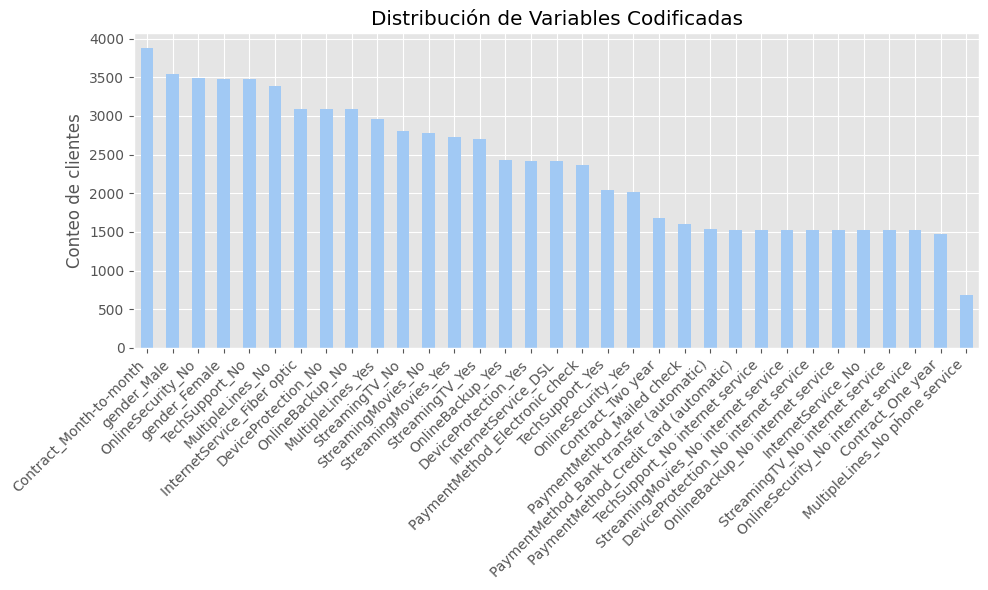

In [9]:
# Mostrar nuevas columnas creadas
new_dummy_cols = list(set(df_processed.columns) - set(df_model.columns))
print(f"\nSe crearon {len(new_dummy_cols)} nuevas columnas dummy:")
print(new_dummy_cols)

# Distribución de variables codificadas
plt.figure(figsize=(10, 6))
df_processed[new_dummy_cols].sum().sort_values(ascending=False).plot(
    kind='bar',
    title='Distribución de Variables Codificadas'
)
plt.ylabel('Conteo de clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Configurar el transformador
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, dtype='int8'),categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformación
X_processed = preprocessor.fit_transform(df_model.drop('Churn', axis=1))

# Obtener nombres de columnas
new_columns = (list(preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)) +
               [col for col in df_model.columns if col not in categorical_cols and col != 'Churn'])

# Crear DataFrame final
df_sklearn_processed = pd.DataFrame(X_processed, columns=new_columns, index=df_model.index)

print("\nDataFrame procesado con sklearn:")
display(df_sklearn_processed.head())


DataFrame procesado con sklearn:


,gender_Female,gender_Male,Partner_False,Partner_True,Dependents_False,Dependents_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_False,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
0,1,0,0,1,0,1,0,1,0,0,...,0,0,1,1,0,0,False,9,65.6,593.3
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,False,9,59.9,542.4
2,0,1,1,0,1,0,1,0,0,0,...,1,0,0,1,0,0,False,4,73.9,280.85
3,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,True,13,98.0,1237.85
4,1,0,0,1,1,0,1,0,0,0,...,0,0,1,1,0,0,True,3,83.9,267.4


In [11]:
# Unir con la variable objetivo para crear dataset completo
df_final = df_processed.copy()
df_final['Churn'] = churn_series.astype('int8')  # Guardar como variable numérica

# Guardar en archivo (opcional)
df_final.to_csv('telecom_data_processed.csv', index=False)
print("\nDataset procesado guardado como 'telecom_data_processed.csv'")

# Información final
print("\nResumen final:")
print(f"- Variables originales: {len(df_model.columns)}")
print(f"- Variables procesadas: {len(df_processed.columns)}")
print(f"- Muestras: {len(df_processed)}")
print("Variables booleanas convertidas a int8:", bool_cols)


Dataset procesado guardado como 'telecom_data_processed.csv'

Resumen final:
- Variables originales: 20
- Variables procesadas: 41
- Muestras: 7032
Variables booleanas convertidas a int8: ['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService']


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int8   
 1   Partner                                  7032 non-null   int8   
 2   Dependents                               7032 non-null   int8   
 3   tenure                                   7032 non-null   int64  
 4   PaperlessBilling                         7032 non-null   int8   
 5   Charges.Monthly                          7032 non-null   float64
 6   Charges.Total                            7032 non-null   float64
 7   PhoneService                             7032 non-null   int8   
 8   gender_Female                            7032 non-null   int8   
 9   gender_Male                              7032 non-null   int8   
 10  Contract_Month-to-month                  7032 non-nul

🎯 Correlación y Selección de Variables

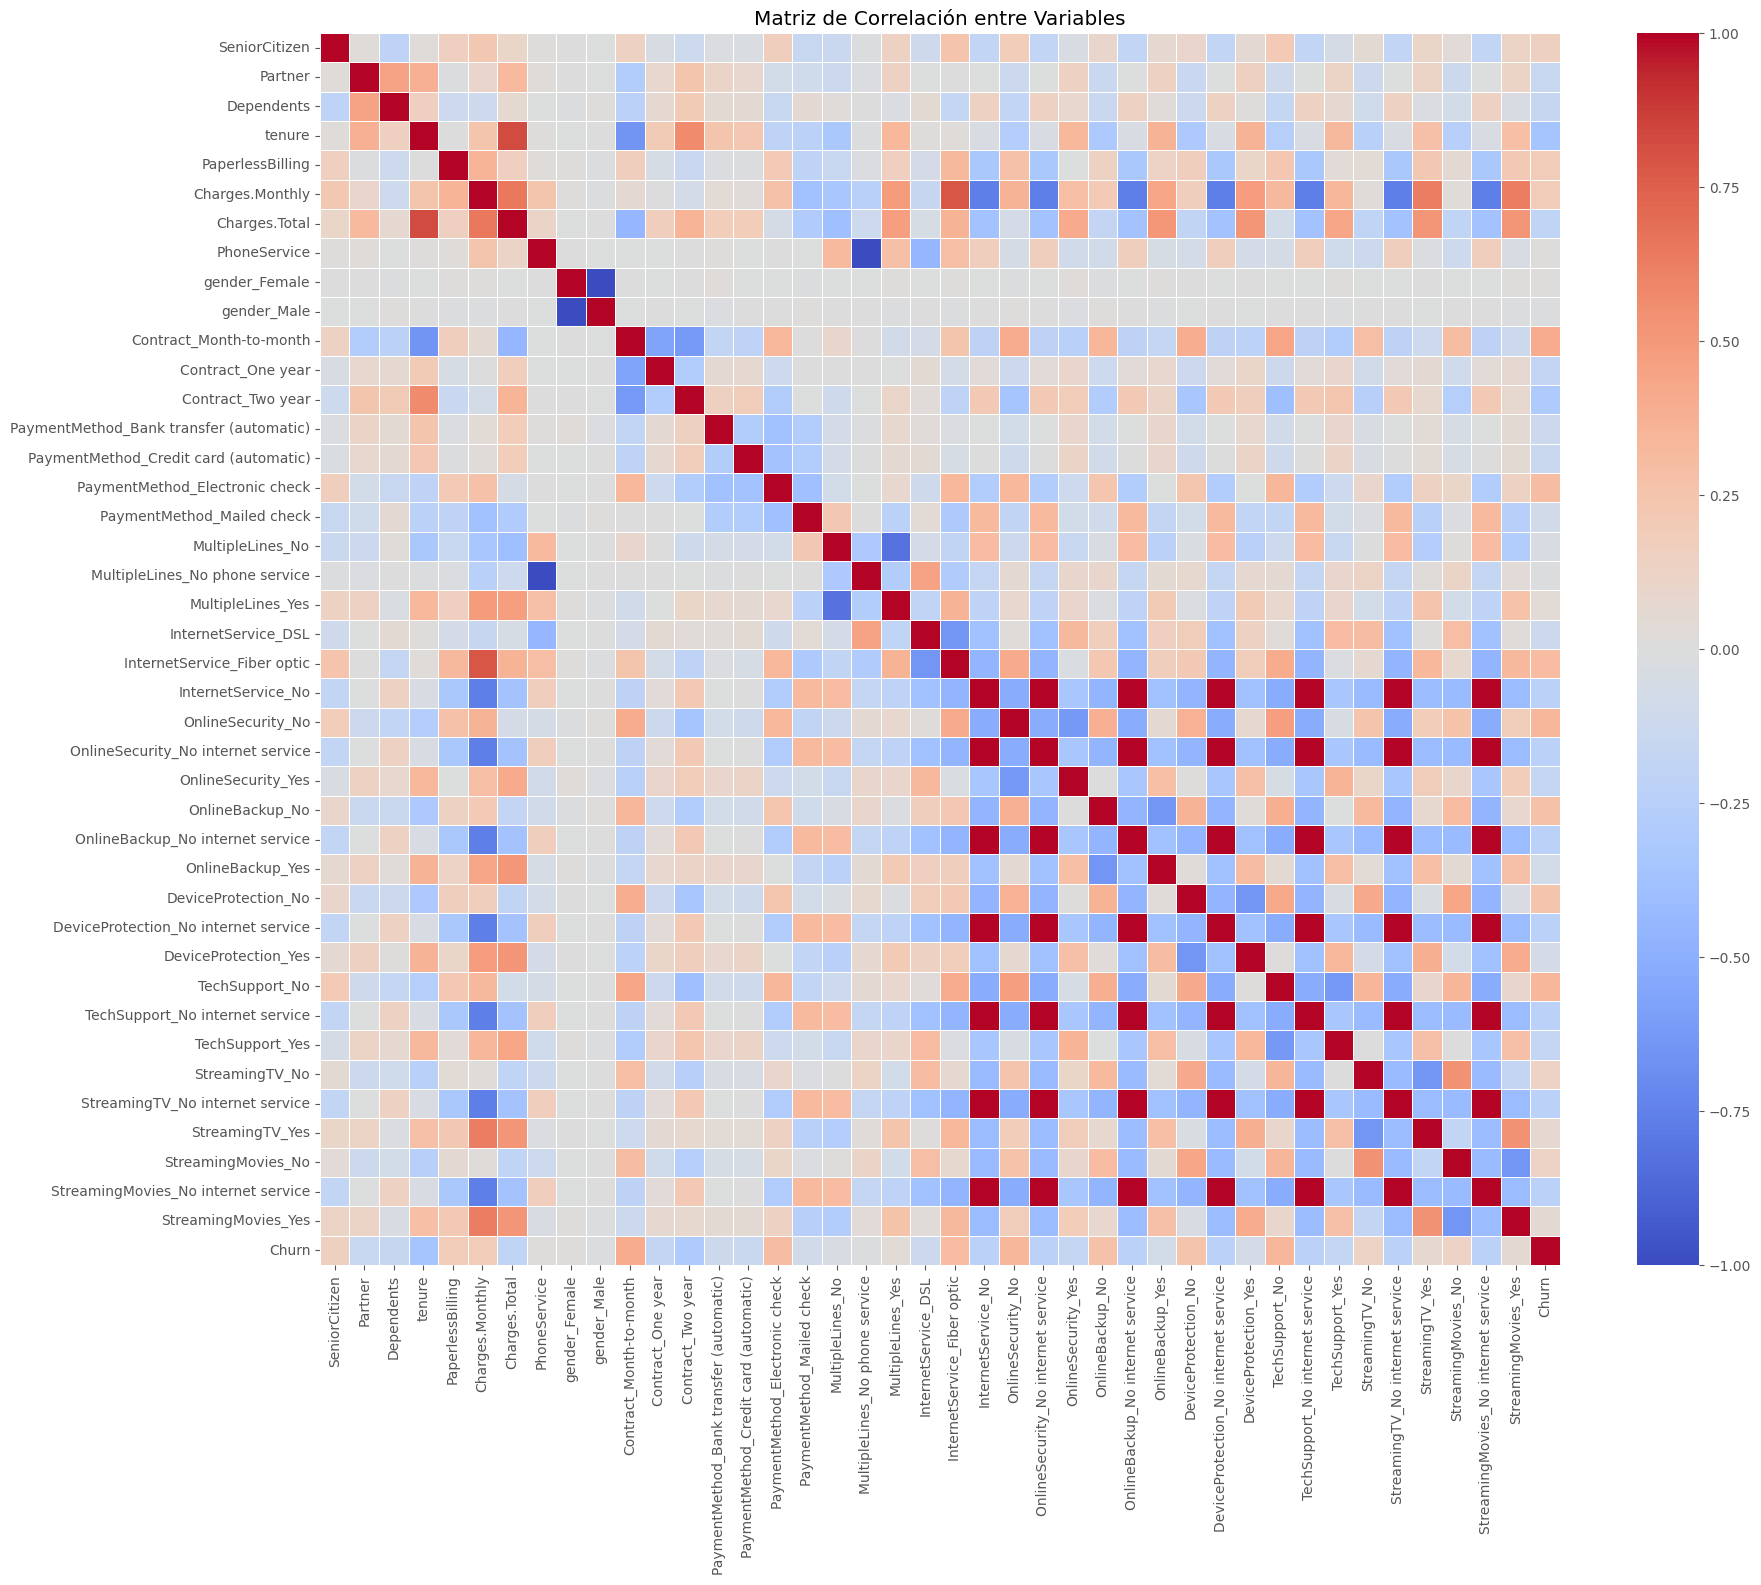

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = df_final.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 16))

# Crear un heatmap de la matriz de correlación
sns.heatmap(correlation_matrix,
            annot=False,  # Para no mostrar los valores (el mapa sería muy grande)
            cmap='coolwarm',
            center=0,
            fmt=".2f",
            linewidths=0.5)

plt.title("Matriz de Correlación entre Variables")
plt.show()

In [15]:
# Correlación con la variable Churn (ordenada)
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
Charges.Monthly                            0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender_Female                              0.008545
gender_Male                               -0.008545
MultipleLine

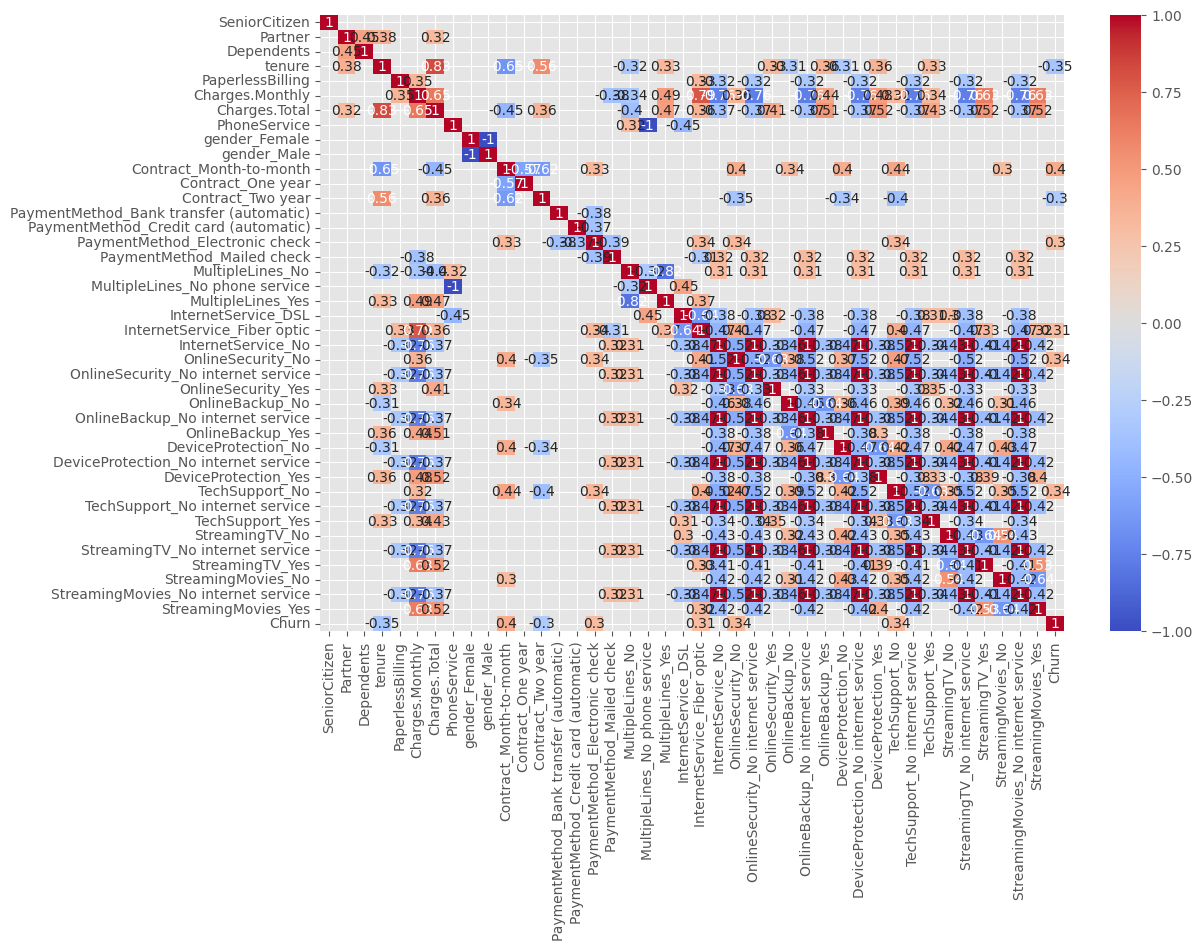

In [16]:
strong_corr = correlation_matrix[abs(correlation_matrix) > 0.3]
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm')
plt.show()

<Axes: >

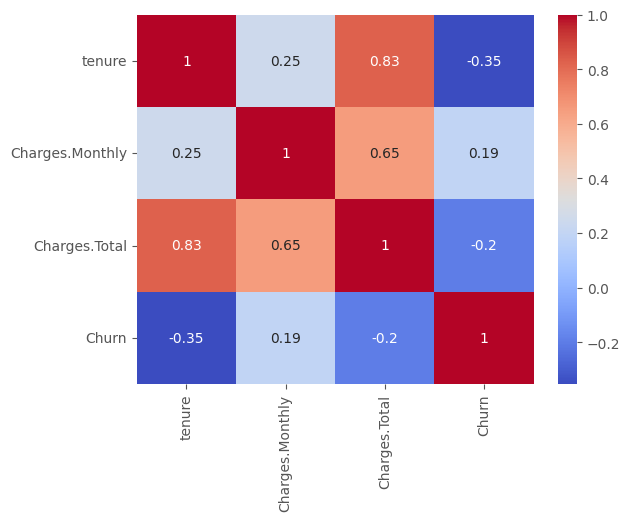

In [18]:
# Seleccionar solo variables numéricas no binarias (ej. tenure, charges)
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Churn']
sns.heatmap(df_final[numeric_cols].corr(), annot=True, cmap='coolwarm')

Análisis de multicolinealidad (VIF):
                                   Variable        VIF
3               InternetService_Fiber optic  77.764483
7                           Charges.Monthly  76.484871
13                      InternetService_DSL  29.925049
16                            Charges.Total  17.207880
11                                   tenure  15.166260
0                   Contract_Month-to-month   4.510995
2                            TechSupport_No   3.902158
1                         OnlineSecurity_No   3.785184
17                           StreamingTV_No   3.417770
18                       StreamingMovies_No   3.384542
4            PaymentMethod_Electronic check   3.263715
6                       DeviceProtection_No   3.123304
5                           OnlineBackup_No   2.963046
8                          PaperlessBilling   2.945310
14                                  Partner   2.821482
10                        Contract_Two year   2.423367
19  PaymentMethod_Bank trans

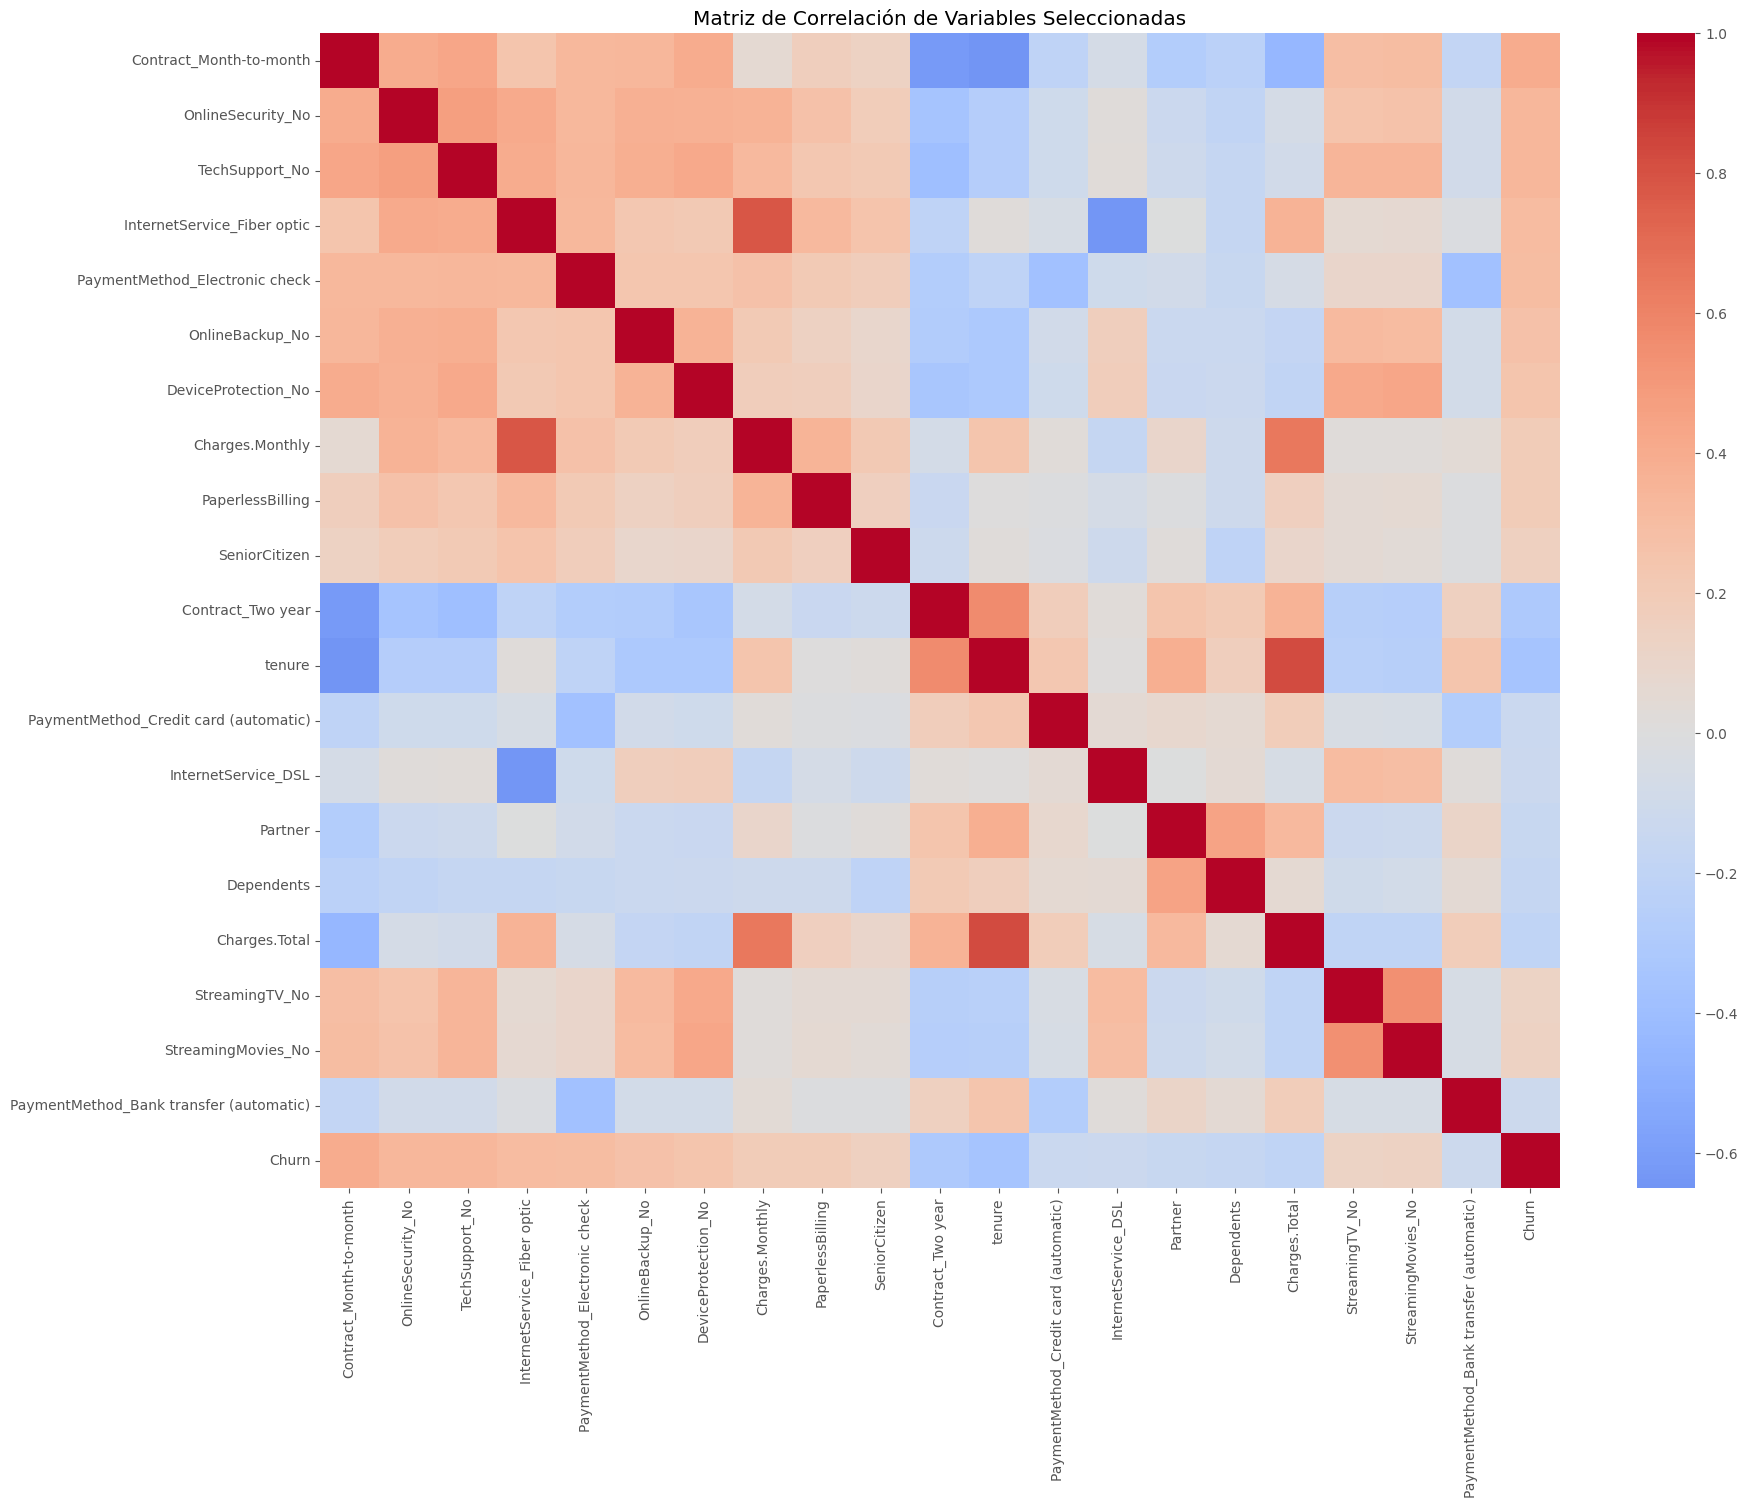


Dimensión de los conjuntos:
Train: (5625, 20), Test: (1407, 20)

Distribución de Churn en train: 
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64
Distribución de Churn en test: 
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# 1. Selección de las 25 variables
selected_features = [
    'Contract_Month-to-month',
    'OnlineSecurity_No',
    'TechSupport_No',
    'InternetService_Fiber optic',
    'PaymentMethod_Electronic check',
    'OnlineBackup_No',
    'DeviceProtection_No',
    'Charges.Monthly',
    'PaperlessBilling',
    'SeniorCitizen',
    'Contract_Two year',
    'tenure',
    'OnlineSecurity_Yes',
    'TechSupport_Yes',
    'PaymentMethod_Credit card (automatic)',
    'InternetService_DSL',
    'Partner',
    'Dependents',
    'Charges.Total',
    'Contract_One year',
    'StreamingTV_No',
    'StreamingMovies_No',
    'PaymentMethod_Bank transfer (automatic)',
    'DeviceProtection_Yes',
    'OnlineBackup_Yes',
    'Churn'  # Variable objetivo
]

# Filtrar el dataframe
# Asumimos que df_final está cargado
# df_model = df_final[selected_features].copy()

# Solución: Eliminar variables redundantes (una de cada grupo one-hot encoded)
# Esto debe hacerse ANTES de calcular el VIF
df_model = df_final.loc[:, selected_features].copy()

df_model_final = df_model.drop(columns=[
    'Contract_One year', # Se mantiene 'Month-to-month' y 'Two year'
    'OnlineSecurity_Yes', # Se mantiene 'No'
    'TechSupport_Yes', # Se mantiene 'No'
    'DeviceProtection_Yes', # Se mantiene 'No'
    'OnlineBackup_Yes', # Se mantiene 'No'
    # También podría ser necesario eliminar una de las variables de PaymentMethod
    # si todas las categorías están presentes
])

# 2. Análisis de multicolinealidad en el dataframe limpio
# Calcular VIF (Factor de Inflación de Varianza)
vif_data = pd.DataFrame()
variables = df_model_final.drop(columns=['Churn']).columns
vif_data["Variable"] = variables
vif_data["VIF"] = [variance_inflation_factor(df_model_final.drop(columns=['Churn']).values, i)
                       for i in range(len(variables))]

print("Análisis de multicolinealidad (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False))

# Visualización de correlaciones entre variables
plt.figure(figsize=(20, 15))
sns.heatmap(df_model_final.corr(), annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación de Variables Seleccionadas")
plt.show()

# El resto de tu código para división de datos y exportación sigue siendo válido
# 3. Preparación de datos para el modelo
X = df_model_final.drop(columns=['Churn'])
y = df_model_final['Churn']

# División train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDimensión de los conjuntos:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"\nDistribución de Churn en train: \n{y_train.value_counts(normalize=True)}")
print(f"Distribución de Churn en test: \n{y_test.value_counts(normalize=True)}")

# 4. Exportar datos preparados (opcional)
df_model_final.to_csv('datos_modelo_churn.csv', index=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero

Análisis de multicolinealidad (VIF):
                                   Variable        VIF
1                         OnlineSecurity_No        inf
6                       DeviceProtection_No        inf
2                            TechSupport_No        inf
3               InternetService_Fiber optic        inf
5                           OnlineBackup_No        inf
23                     DeviceProtection_Yes        inf
15                      InternetService_DSL        inf
13                          TechSupport_Yes        inf
12                       OnlineSecurity_Yes        inf
24                         OnlineBackup_Yes        inf
7                           Charges.Monthly  25.555678
0                   Contract_Month-to-month  14.793172
18                            Charges.Total  10.780980
10                        Contract_Two year   8.680602
11                                   tenure   7.518552
19                        Contract_One year   6.531825
20                          

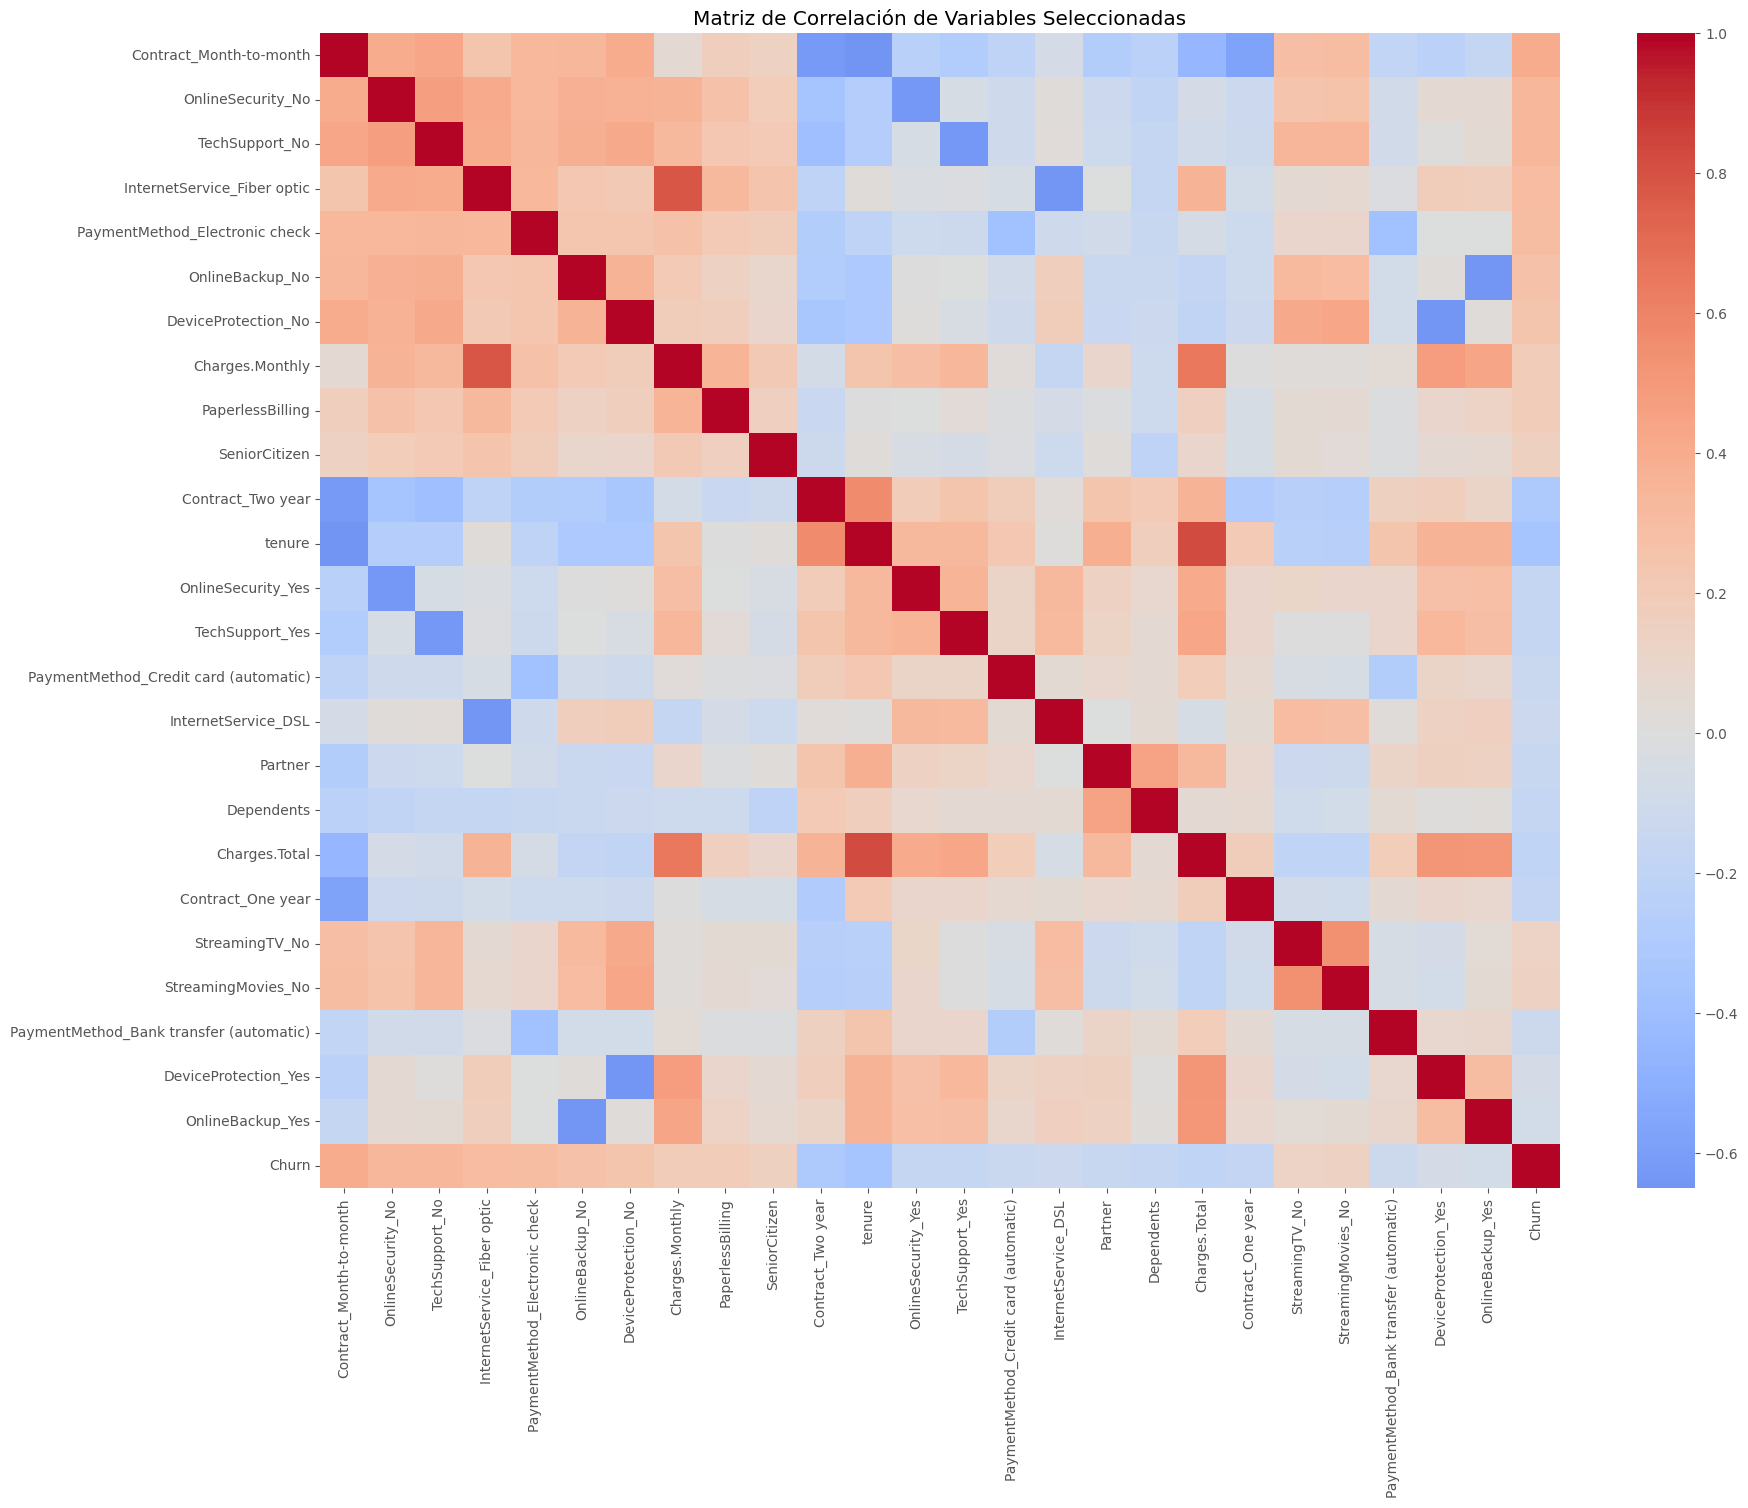


Variables con alta multicolinealidad (VIF > 10): ['Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic', 'OnlineBackup_No', 'DeviceProtection_No', 'Charges.Monthly', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'InternetService_DSL', 'Charges.Total', 'DeviceProtection_Yes', 'OnlineBackup_Yes']

Dimensión de los conjuntos:
Train: (5625, 21), Test: (1407, 21)

Distribución de Churn en train: 
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64
Distribución de Churn en test: 
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# 1. Selección de las 25 variables basadas en correlación
selected_features = [
    'Contract_Month-to-month',
    'OnlineSecurity_No',
    'TechSupport_No',
    'InternetService_Fiber optic',
    'PaymentMethod_Electronic check',
    'OnlineBackup_No',
    'DeviceProtection_No',
    'Charges.Monthly',
    'PaperlessBilling',
    'SeniorCitizen',
    'Contract_Two year',
    'tenure',
    'OnlineSecurity_Yes',
    'TechSupport_Yes',
    'PaymentMethod_Credit card (automatic)',
    'InternetService_DSL',
    'Partner',
    'Dependents',
    'Charges.Total',
    'Contract_One year',
    'StreamingTV_No',
    'StreamingMovies_No',
    'PaymentMethod_Bank transfer (automatic)',
    'DeviceProtection_Yes',
    'OnlineBackup_Yes',
    'Churn'  # Variable objetivo
]

# Filtrar el dataframe
df_model = df_final[selected_features].copy()

# 2. Análisis de multicolinealidad
# Calcular VIF (Factor de Inflación de Varianza)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_model.drop(columns=['Churn']).columns
vif_data["VIF"] = [variance_inflation_factor(df_model.drop(columns=['Churn']).values, i)
                         for i in range(len(df_model.drop(columns=['Churn']).columns))]

print("Análisis de multicolinealidad (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False))

# Visualización de correlaciones entre variables
plt.figure(figsize=(20, 15))
sns.heatmap(df_model.corr(), annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación de Variables Seleccionadas")
plt.show()

# 3. Eliminar variables redundantes (VIF > 10)
high_vif = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()
print(f"\nVariables con alta multicolinealidad (VIF > 10): {high_vif}")

# Eliminamos las versiones "Yes" de variables donde ya tenemos el "No" (menos interpretables)
df_model_final = df_model.drop(columns=[
    'OnlineSecurity_Yes',
    'TechSupport_Yes',
    'DeviceProtection_Yes',
    'OnlineBackup_Yes'
])

# 4. Preparación de datos para el modelo
X = df_model_final.drop(columns=['Churn'])
y = df_model_final['Churn']

# División train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDimensión de los conjuntos:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"\nDistribución de Churn en train: \n{y_train.value_counts(normalize=True)}")
print(f"Distribución de Churn en test: \n{y_test.value_counts(normalize=True)}")

# 5. Exportar datos preparados (opcional)
df_model_final.to_csv('datos_modelo_churn.csv', index=False)

In [22]:
df_model_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Contract_Month-to-month                  7032 non-null   int8   
 1   OnlineSecurity_No                        7032 non-null   int8   
 2   TechSupport_No                           7032 non-null   int8   
 3   InternetService_Fiber optic              7032 non-null   int8   
 4   PaymentMethod_Electronic check           7032 non-null   int8   
 5   OnlineBackup_No                          7032 non-null   int8   
 6   DeviceProtection_No                      7032 non-null   int8   
 7   Charges.Monthly                          7032 non-null   float64
 8   PaperlessBilling                         7032 non-null   int8   
 9   SeniorCitizen                            7032 non-null   int8   
 10  Contract_Two year                        7032 non-nul

🤖 Modelado Predictivo

DECISION TREE CLASSIFIER

Métricas Decision Tree:
Accuracy: 0.7910
Precision: 0.6149
Recall: 0.5722
F1-Score: 0.5928
ROC AUC: 0.8316


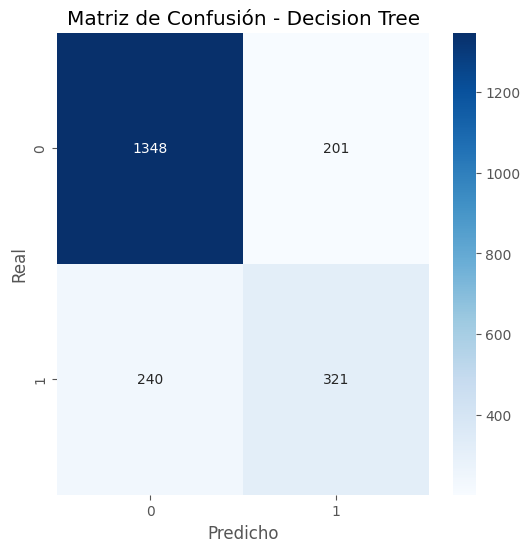


LOGISTIC REGRESSION (con normalización)

Métricas Logistic Regression:
Accuracy: 0.7995
Precision: 0.6474
Recall: 0.5401
F1-Score: 0.5889
ROC AUC: 0.8433


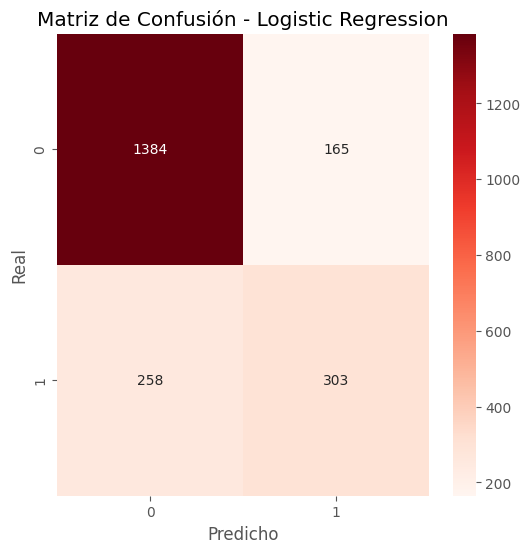


COMPARACIÓN DE MODELOS
      Metric  Decision Tree  Logistic Regression
0   Accuracy       0.790995             0.799526
1  Precision       0.614943             0.647436
2     Recall       0.572193             0.540107
3   F1-Score       0.592798             0.588921
4    ROC AUC       0.831616             0.843308


<Figure size 800x600 with 0 Axes>

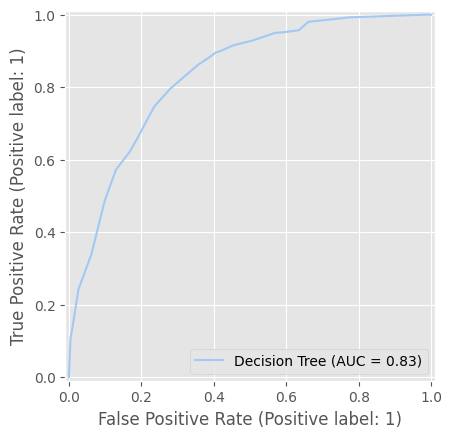

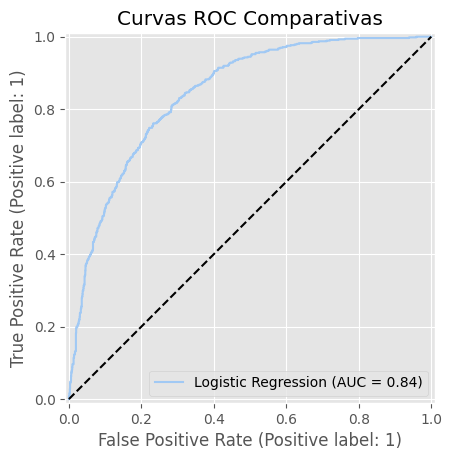

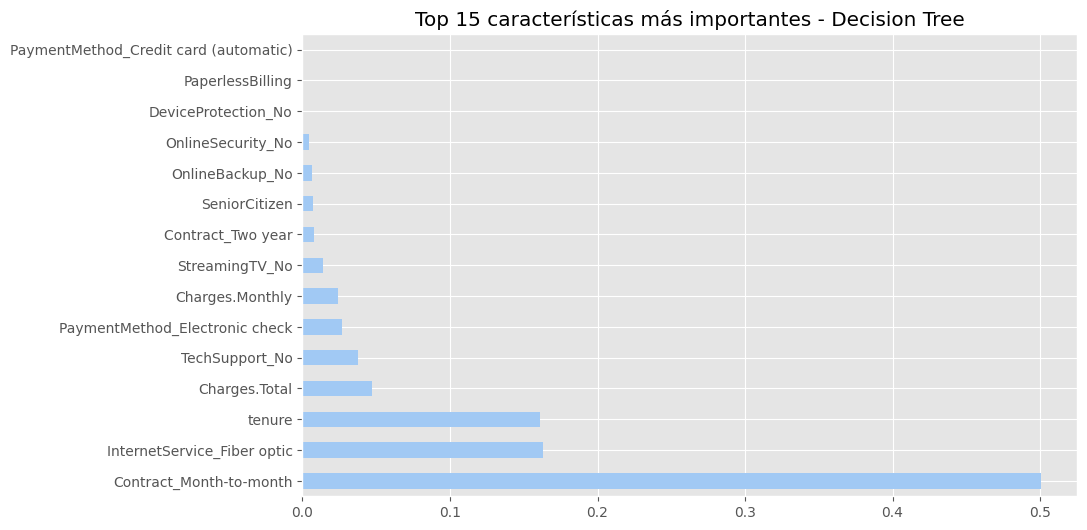

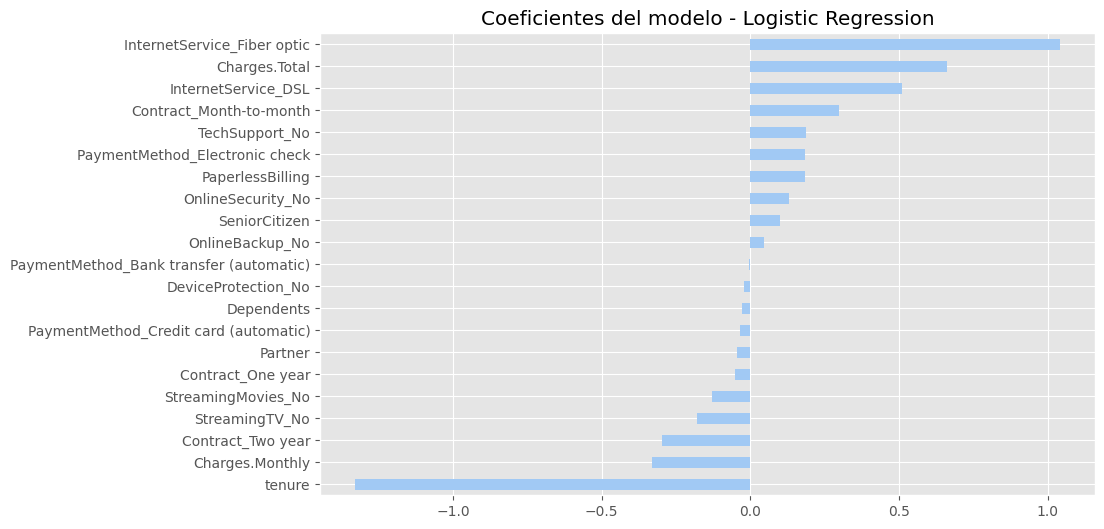

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, RocCurveDisplay)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos y dividir (70-30)
X = df_model_final.drop(columns=['Churn'])
y = df_model_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 2. Modelo Decision Tree (sin normalización)
print("="*60)
print("DECISION TREE CLASSIFIER")
print("="*60)

dt_model = DecisionTreeClassifier(
    max_depth=5,  # Controlar sobreajuste
    min_samples_split=10,
    random_state=42
)

dt_model.fit(X_train, y_train)

# Evaluación
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("\nMétricas Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_dt):.4f}")

# Matriz de confusión
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Decision Tree')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 3. Modelo Logistic Regression (con normalización)
print("\n" + "="*60)
print("LOGISTIC REGRESSION (con normalización)")
print("="*60)

# Normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(
    penalty='l2',  # Regularización L2
    C=1.0,         # Parámetro de regularización
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

lr_model.fit(X_train_scaled, y_train)

# Evaluación
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("\nMétricas Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_lr):.4f}")

# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión - Logistic Regression')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 4. Comparación de modelos
print("\n" + "="*60)
print("COMPARACIÓN DE MODELOS")
print("="*60)

comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Decision Tree': [
        accuracy_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_dt),
        roc_auc_score(y_test, y_proba_dt)
    ],
    'Logistic Regression': [
        accuracy_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_proba_lr)
    ]
})

print(comparison)

# 5. Curvas ROC comparativas
plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, name='Decision Tree')
RocCurveDisplay.from_estimator(lr_model, X_test_scaled, y_test, name='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curvas ROC Comparativas')
plt.show()

# 6. Importancia de características (Decision Tree)
plt.figure(figsize=(10,6))
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 características más importantes - Decision Tree')
plt.show()

# Coeficientes Logistic Regression
plt.figure(figsize=(10,6))
coefs = pd.Series(lr_model.coef_[0], index=X.columns)
coefs.sort_values().plot(kind='barh')
plt.title('Coeficientes del modelo - Logistic Regression')
plt.show()

# Análisis de la Importancia de las Variables

/tmp/ipython-input-1134323261.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='viridis')


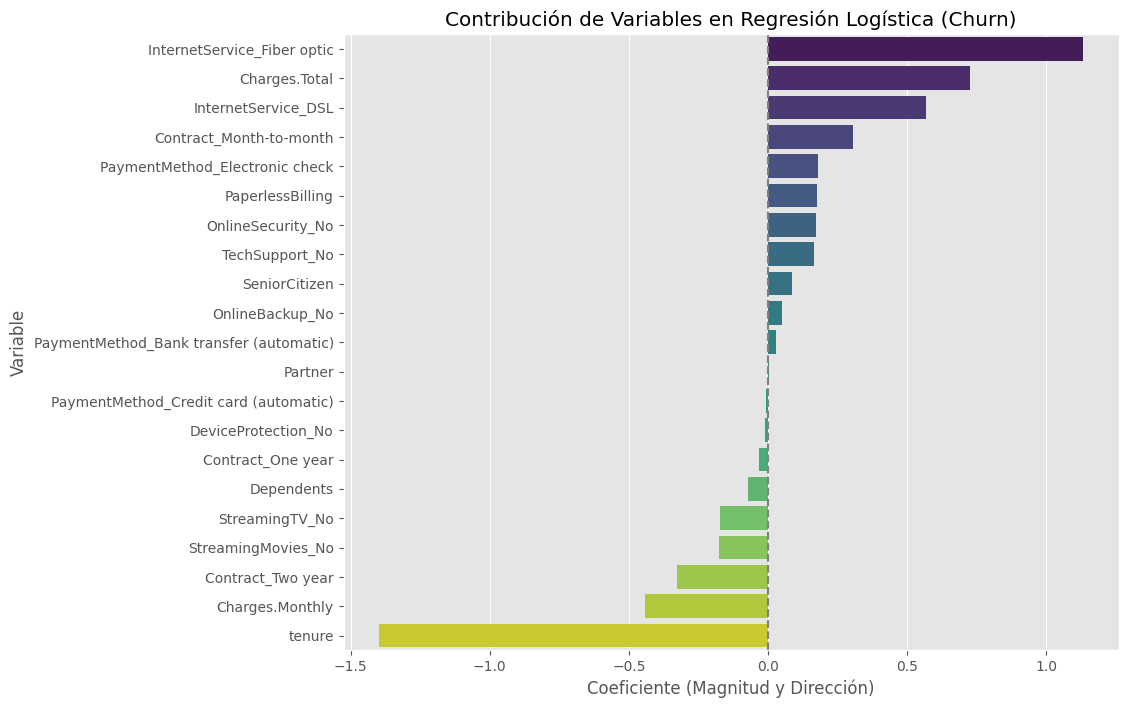


Interpretación de Coeficientes - Regresión Logística
Coeficientes positivos aumentan la probabilidad de Churn
Coeficientes negativos disminuyen la probabilidad de Churn

Variables que MÁS AUMENTAN el Churn:
- InternetService_Fiber optic: 1.133
- Charges.Total: 0.725
- InternetService_DSL: 0.569

Variables que MÁS DISMINUYEN el Churn:
- Contract_Two year: -0.326
- Charges.Monthly: -0.442
- tenure: -1.399


/tmp/ipython-input-1134323261.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importance_df.head(15), palette='rocket')


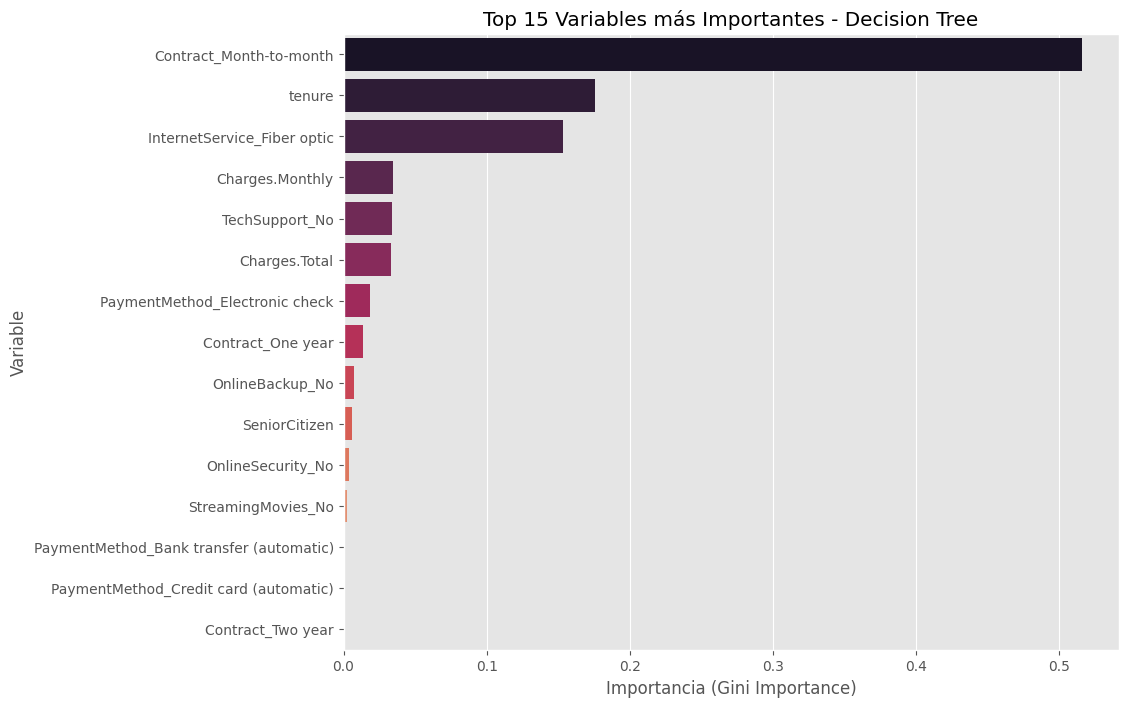


Interpretación de Importancia - Decision Tree
Las variables con mayor importancia tienen más influencia en las decisiones del árbol

- Contract_Month-to-month: 0.516
- tenure: 0.176
- InternetService_Fiber optic: 0.153
- Charges.Monthly: 0.034
- TechSupport_No: 0.034

Comparación entre Modelos (Top 5 Variables)
Regresión Logística - Ranking por magnitud de coeficiente:
                       Variable  Coeficiente
20                       tenure    -1.399071
8   InternetService_Fiber optic     1.132898
1                 Charges.Total     0.725282
7           InternetService_DSL     0.568722
0               Charges.Monthly    -0.441970

Decision Tree - Ranking por importancia:
                       Variable  Importancia
2       Contract_Month-to-month     0.515746
20                       tenure     0.175764
8   InternetService_Fiber optic     0.153373
0               Charges.Monthly     0.034243
19               TechSupport_No     0.033899


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Preparación de datos (usando el mismo conjunto que antes)
X = df_model_final.drop(columns=['Churn'])
y = df_model_final['Churn']

# Solo necesitamos escalar para Regresión Logística
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Regresión Logística: Análisis de coeficientes
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_scaled, y)

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr_model.coef_[0]
}).sort_values('Coeficiente', ascending=False)

# Visualización coeficientes LR
plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='viridis')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Contribución de Variables en Regresión Logística (Churn)')
plt.xlabel('Coeficiente (Magnitud y Dirección)')
plt.ylabel('Variable')
plt.show()

# Interpretación textual de coeficientes
print("\n" + "="*60)
print("Interpretación de Coeficientes - Regresión Logística")
print("="*60)
print("Coeficientes positivos aumentan la probabilidad de Churn")
print("Coeficientes negativos disminuyen la probabilidad de Churn\n")

top_positive = coef_df.head(3)
top_negative = coef_df.tail(3)

print("Variables que MÁS AUMENTAN el Churn:")
for idx, row in top_positive.iterrows():
    print(f"- {row['Variable']}: {row['Coeficiente']:.3f}")

print("\nVariables que MÁS DISMINUYEN el Churn:")
for idx, row in top_negative.iterrows():
    print(f"- {row['Variable']}: {row['Coeficiente']:.3f}")

# 3. Decision Tree: Importancia de variables
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X, y)

# Importancia de características
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': dt_model.feature_importances_
}).sort_values('Importancia', ascending=False)

# Visualización importancia DT
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Variable', data=importance_df.head(15), palette='rocket')
plt.title('Top 15 Variables más Importantes - Decision Tree')
plt.xlabel('Importancia (Gini Importance)')
plt.ylabel('Variable')
plt.show()

# Interpretación textual
print("\n" + "="*60)
print("Interpretación de Importancia - Decision Tree")
print("="*60)
print("Las variables con mayor importancia tienen más influencia en las decisiones del árbol\n")

top_features = importance_df.head(5)
for idx, row in top_features.iterrows():
    print(f"- {row['Variable']}: {row['Importancia']:.3f}")

# 4. Comparación entre ambos modelos
compare_df = pd.merge(coef_df, importance_df, on='Variable', how='outer')
compare_df['Coeficiente_abs'] = compare_df['Coeficiente'].abs()
compare_df['Rank_LR'] = compare_df['Coeficiente_abs'].rank(ascending=False)
compare_df['Rank_DT'] = compare_df['Importancia'].rank(ascending=False)

print("\n" + "="*60)
print("Comparación entre Modelos (Top 5 Variables)")
print("="*60)
print("Regresión Logística - Ranking por magnitud de coeficiente:")
print(compare_df.sort_values('Rank_LR').head(5)[['Variable', 'Coeficiente']])

print("\nDecision Tree - Ranking por importancia:")
print(compare_df.sort_values('Rank_DT').head(5)[['Variable', 'Importancia']])

# Análisis de Desempeño y Elección del Mejor Modelo
Basándonos en las métricas no hay un claro "mejor" modelo en todas las categorías, ya que cada uno destaca en métricas diferentes. Sin embargo, para tomar una decisión informada, es crucial entender el problema que se está resolviendo. En este caso, el problema es la predicción de "churn" (abandono de clientes).

Regresión Logística: Este modelo tiene la mejor exactitud y precisión. Una alta precisión (0.6474) indica que, cuando el modelo predice que un cliente va a abandonar ("churn"), es más probable que esa predicción sea correcta que la del Árbol de Decisión. Esto es útil si los falsos positivos (predecir abandono cuando no lo hay) son especialmente costosos.

Árbol de Decisión: Este modelo tiene el mejor recall y F1-Score. Un alto recall (0.5722) significa que el modelo es mejor identificando a los clientes que realmente van a abandonar. Un F1-Score más alto (0.5928) indica un mejor equilibrio general entre precisión y recall. En la mayoría de los casos de predicción de churn, es más importante identificar a tantos clientes que van a abandonar como sea posible para poder retenerlos, incluso si eso significa tener algunos falsos positivos.

Conclusión: Considerando que el objetivo principal es identificar a los clientes que van a abandonar para poder tomar medidas proactivas, el modelo de Árbol de Decisión tuvo un mejor desempeño general debido a su superior Recall y F1-Score. Un alto recall es fundamental para este tipo de problema de negocio.


#Informe de Analisis de Churn y Estrategias de Retencion
1. Introduccion

El objetivo de este informe es identificar los principales factores que influyen en la cancelacion de clientes (Churn) y proponer estrategias de retencion basadas en los resultados obtenidos de los modelos de Regresion Logistica y Arbol de Decision.
2. Factores Clave que Influyen en el Churn
2.1 Variables con Mayor Impacto en la Cancelacion

Regresion Logistica (Coeficientes mas relevantes)

    Variable                       Importancia                  Interpretacion
    InternetService_Fiber optic      +1.133    Los clientes con fibra optica tienen mayor probabilidad de cancelar.
    tenure (Antigüedad)              -1.399    A mayor antigüedad, menor probabilidad de Churn.
    Contract_Month-to-month          +0.516    Los contratos mensuales aumentan el riesgo de abandono.
    Charges.Total                    +0.725    Clientes con gastos acumulados altos son mas propensos a irse.


Arbol de Decision (Variables mas importantes)

    Variable                  Importancia              Interpretacion
    Contract_Month-to-month       0.516      Es la variable que mas influye en las decisiones del modelo.
    tenure                        0.176      La antigüedad es clave para predecir retencion.
    InternetService_Fiber optic   0.153      Confirmacion de que la fibra optica esta asociada a Churn.

2.2 Hallazgos Clave

Factores que Aumentan el Churn:

    Contratos mensuales (flexibilidad para irse).

    Clientes con fibra optica (posiblemente por altas expectativas o problemas tecnicos).

    Gastos totales altos (pueden estar insatisfechos con el costo).

Factores que Reducen el Churn:

    Mayor antigüedad (tenure) (clientes leales).

    Contratos anuales/bianuales (compromiso a largo plazo).

3. Estrategias de Retencion

1.- Mejorar la Experiencia con Fibra Optica

    Accion: Investigar causas de insatisfaccion (velocidad, cortes, atencion al cliente).

    Propuesta:

        Encuestas de satisfaccion para usuarios de fibra.

        Programas de mejora tecnica y soporte prioritario.

2.- Incentivar Contratos a Largo Plazo

    Accion: Reducir la proporcion de clientes con contratos mensuales.

    Propuesta:

        Descuentos exclusivos para contratos de 1 o 2 años.

        Beneficios adicionales (ej: meses gratis, upgrades de velocidad).

3.- Programas de Fidelizacion para Clientes Nuevos

    Accion: Clientes con poca antigüedad (tenure bajo) son mas propensos a irse.

    Propuesta:

        Ofertas especiales en los primeros 6 meses.

        Programa de referidos con beneficios para ambos.

4.- Atencion Proactiva a Clientes con Alto Gasto (Charges.Total)

    Accion: Identificar clientes con gastos elevados y alto riesgo de Churn.

    Propuesta:

        Revisiones de plan para ajustar costos segun su uso real.

        Beneficios personalizados (ej: servicios premium incluidos).

4. Conclusion

Los modelos coinciden en que:

 El tipo de contrato (Month-to-month) y la fibra optica son los mayores predictores de Churn.

  La antigüedad (tenure) es el factor mas protector contra la cancelacion.

Recomendacion Final:
Implementar un programa de retencion segmentado, enfocado en:

    Clientes con fibra optica - Mejorar experiencia.

    Contratos mensuales - Incentivar renovaciones largas.

    Clientes nuevos (tenure bajo) - Programas de fidelizacion.

    Clientes con gastos altos - Ofertas personalizadas.

Proximos Pasos

    Monitorear impacto en la tasa de Churn mensual.
